In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from yellowbrick.target import FeatureCorrelation

C:\Users\jelena\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
cars = pd.read_csv('Datasets/Automobile_data.csv')
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
# mark all missing values (?) as NaN:
cars.replace('?', np.nan, inplace=True)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
# inspect the dataframe:
cars.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [5]:
cars.shape

(205, 26)

In [6]:
cars.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

There is a significant number of records with missing values.

In [7]:
# so let's drop all such records and save it as a new dataframe:

cars.dropna(inplace=True)
cars.shape

(159, 26)

In [8]:
# look at summary statistics for this dataframe:
cars.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,0.735849,98.264151,172.413836,65.607547,53.899371,2461.138365,119.226415,10.161132,26.522013,32.081761
std,1.193086,5.167416,11.523177,1.947883,2.268761,481.941321,30.460791,3.889475,6.097142,6.459189
min,-2.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,7.000000,15.000000,18.000000
25%,0.000000,94.500000,165.650000,64.000000,52.250000,2065.500000,97.000000,8.700000,23.000000,28.000000
50%,1.000000,96.900000,172.400000,65.400000,54.100000,2340.000000,110.000000,9.000000,26.000000,32.000000
75%,2.000000,100.800000,177.800000,66.500000,55.500000,2809.500000,135.000000,9.400000,31.000000,37.000000
max,3.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,23.000000,49.000000,54.000000


Interesting - there is no 'price' or 'horsepower' column (and some other ones we won't be needing right now).

In [9]:
# let's convert values in those 2 columns to float, so we can use them for our analysis:

cars['horsepower'] = pd.to_numeric(cars['horsepower'], downcast="float")
cars['price'] = pd.to_numeric(cars['price'], downcast="float")

In [10]:
# now let's have another look at summary statistics for this dataframe:
cars.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,0.735849,98.264151,172.413836,65.607547,53.899371,2461.138365,119.226415,10.161132,95.836479,26.522013,32.081761,11445.729492
std,1.193086,5.167416,11.523177,1.947883,2.268761,481.941321,30.460791,3.889475,30.718573,6.097142,6.459189,5877.855957
min,-2.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,7.000000,48.000000,15.000000,18.000000,5118.000000
25%,0.000000,94.500000,165.650000,64.000000,52.250000,2065.500000,97.000000,8.700000,69.000000,23.000000,28.000000,7372.000000
50%,1.000000,96.900000,172.400000,65.400000,54.100000,2340.000000,110.000000,9.000000,88.000000,26.000000,32.000000,9233.000000
75%,2.000000,100.800000,177.800000,66.500000,55.500000,2809.500000,135.000000,9.400000,114.000000,31.000000,37.000000,14719.500000
max,3.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,23.000000,200.000000,49.000000,54.000000,35056.000000


In [11]:
# save this new dataframe as a .csv:
cars.to_csv('Datasets/cars_processed.csv', index=False)

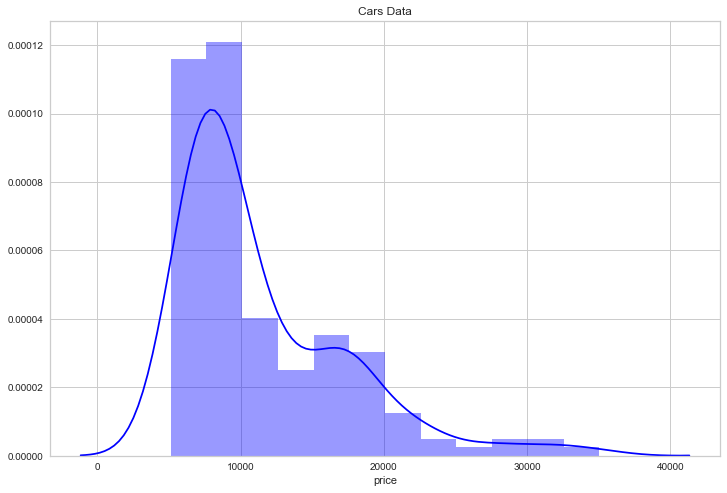

In [12]:
# visualize price distribution (with the KDE curve):

plt.figure(figsize=(12,8))

sns.distplot(cars['price'], color='blue')

plt.title('Cars Data')

plt.show()

We can see that most cars have prices in the range (approximately) $5K-$10K.

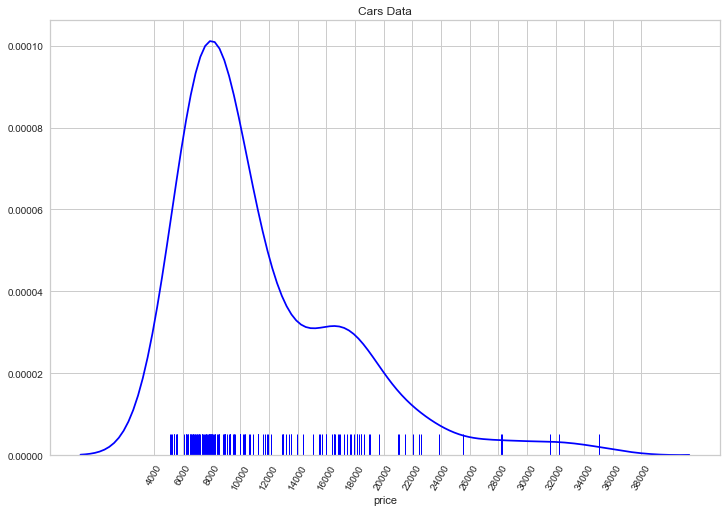

In [13]:
# let's look at that distribution in a bit more detail - visualize a rug plot together with the KDE curve
# and label price intervals in more detail:

plt.figure(figsize=(12,8))

sns.distplot(cars['price'], hist=False, rug=True, color='blue')

plt.xticks(np.arange(4000, 40000, 2000), rotation=60)

plt.title('Cars Data')

plt.show()

We can now see (more precisely) that most of the individual data points (cars) lie between $6K and $8K.

We can assume that horsepower and fuel consumption probably affect the price, so let's check those relationships:

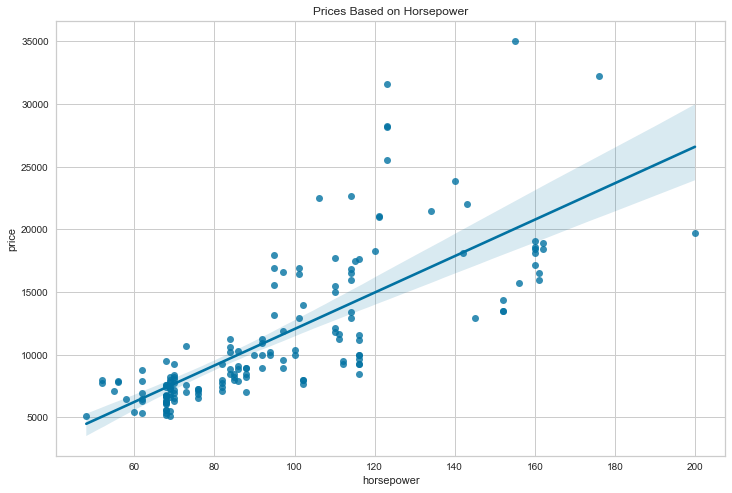

In [14]:
# let's look at the relationship between horsepower and price:

plt.figure(figsize=(12,8))

sns.regplot(x='horsepower', y='price', data=cars)

plt.title('Prices Based on Horsepower')

plt.show()

We can see a positive correlation between horsepower and price - as horsepower increases, so does the price.

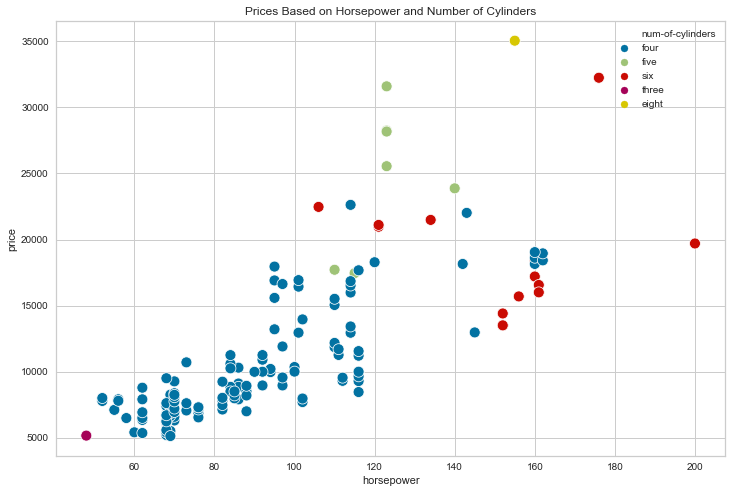

In [15]:
# let's add another variable here - number of cylinders:

plt.figure(figsize=(12,8))

sns.scatterplot(x='horsepower', y='price', data=cars, hue='num-of-cylinders', s=120)

plt.title('Prices Based on Horsepower and Number of Cylinders')

plt.show()

Here we can notice that most cars have 4 cylinders, rarely 3 or 8, and some have 5 or 6.
Apparently, those with 5 cylinders tend to be a little pricier than those with 4 or 6.
We can also notice that cars with 4 or fewer cylinders tend to have lower horsepower,
those with 5 - between 100 and 140, while those with 6 cylinders range between 100 and 200 horsepower.

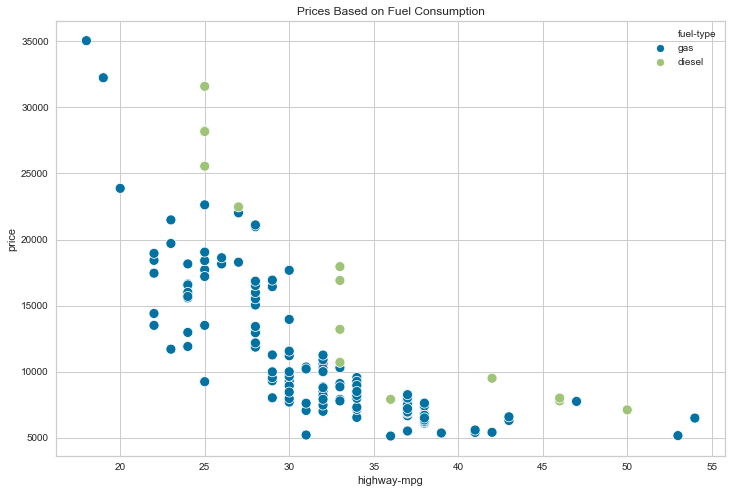

In [16]:
# now let's inspect how fuel consumption affects the price:

plt.figure(figsize=(12,8))

sns.scatterplot(x='highway-mpg', y='price', data=cars, hue='fuel-type', s=100)

plt.title('Prices Based on Fuel Consumption')

plt.show()

We can see that there's a negative correlation between these 2 variables (price and fuel consumption),
and also that there are far more cars that use gas than the ones that run on diesel

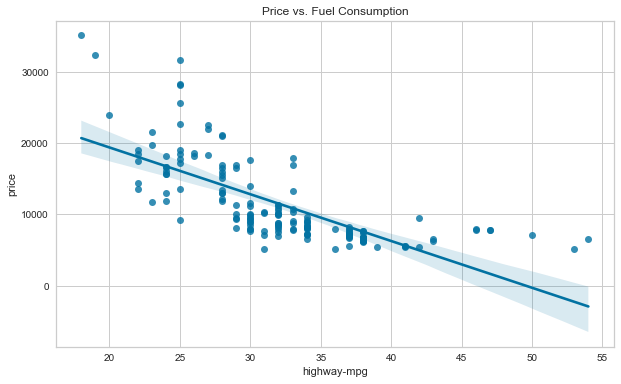

In [17]:
# let's inspect the relationship between prices and fuel consumption further:

plt.figure(figsize=(10,6))

sns.regplot(x='highway-mpg', y='price', data=cars)

plt.title('Price vs. Fuel Consumption')

plt.show()

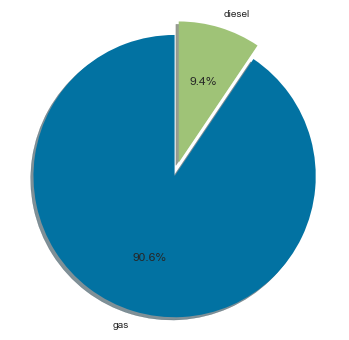

In [19]:
# now let's go back to what we saw in the 'Prices Based on Fuel Consumption' scatter plot
# when it comes to distribution of cars that run on gas and diesel:

plt.figure(figsize=(6,6))

gas = round(cars['fuel-type'].value_counts()[0]/len(cars)*100, 2)
diesel = round(cars['fuel-type'].value_counts()[1]/len(cars)*100, 2)
sizes = [gas, diesel]
labels = 'gas', 'diesel'
explode = (0, 0.1)

plt.pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.show()

<Figure size 1080x576 with 0 Axes>

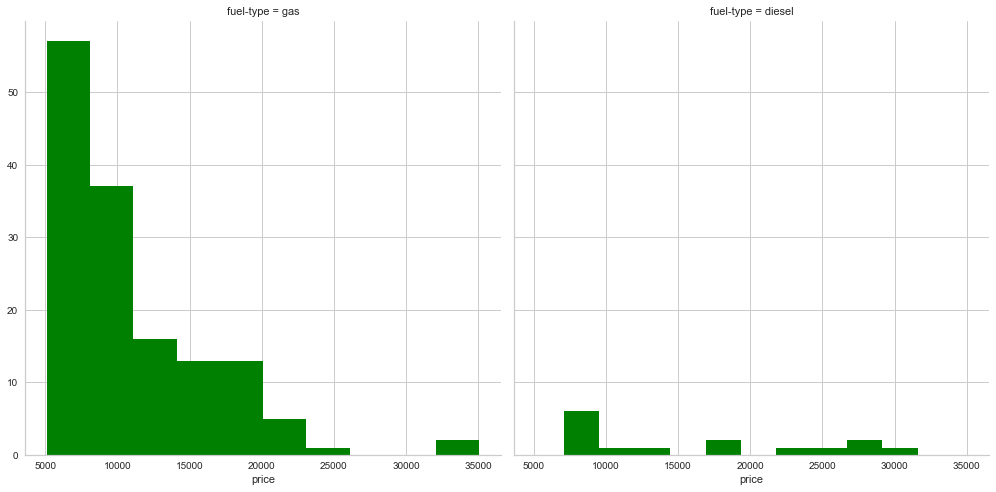

In [18]:
# let's look at this distribution together with prices:

plt.figure(figsize=(15,8))

fg = sns.FacetGrid(cars, col='fuel-type', height=7, aspect=1)

fg.map(plt.hist, 'price', color='green')

plt.show()

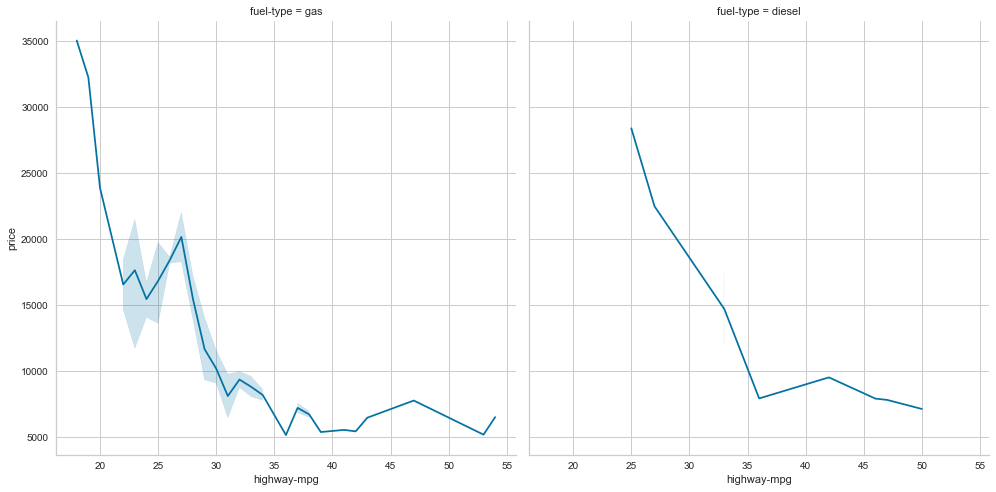

In [20]:
# this doesn't tell us much when it comes to price, there is no apparent trend,
# considering we saw earlier that most cars are in the $6-8K price range anyway, 
# but let's check if fuel consumption vs. price correlation changes with fuel type:

fg = sns.FacetGrid(cars, col='fuel-type', height=7, aspect=1)

fg.map(sns.lineplot, 'highway-mpg', 'price')

plt.show()

So the answer is no - fuel type does not affect fuel consumption vs. price relationship, 
we can see that there is a negative correlation in both cases.

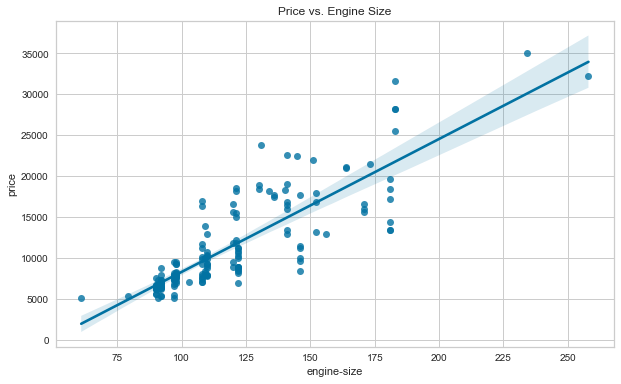

In [21]:
# let's check whether engine size has any effect on the price:

plt.figure(figsize=(10,6))

sns.regplot(x='engine-size', y='price', data=cars)

plt.title('Price vs. Engine Size')

plt.show()

The above regression plot shows us that as engine size grows - so does the price.

C:\Users\jelena\Anaconda\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


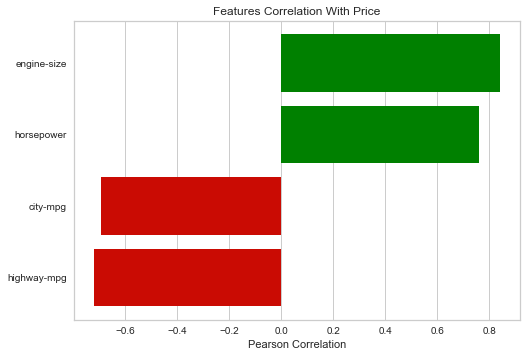

In [22]:
# we could also calculate Pearson correlation coefficients for the relationships inspected so far
# to double-check the findings:

target = cars['price']
features = cars[['highway-mpg', 'city-mpg', 'horsepower', 'engine-size']]
feature_names = list(features.columns)

# instantiate the FeatureCorrelation Python object:
visualizer = FeatureCorrelation(labels = feature_names, 
                                title='Features Correlation With Price', 
                                color=['r','r','green','green'])
# calculate correlation coefficients:
visualizer.fit(features, target)
# display them:
visualizer.poof()

The above visualization confirms the previous findings:
there is a strong positive correlation between engine size and price, and between horsepower and price,
and there is a negative correlation between fuel consumption and price.